## Imports

In [304]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load Data

In [305]:
RAW_DATA_PATH = os.path.normpath(os.path.join("..", "data"))
train_df = pd.read_csv(os.path.join(RAW_DATA_PATH, "dreaddit-train.csv"))
test_df = pd.read_csv(os.path.join(RAW_DATA_PATH, "dreaddit-test.csv"))

In [306]:
train_df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [307]:
test_df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


## Check for NaN Values

In [308]:
train_df[train_df.isna().any(axis=1)]

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment


In [309]:
test_df[test_df.isna().any(axis=1)]

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment


## Exploratory Data Analysis

In [ ]:
PLOTS_FOLDER_PATH = os.path.normpath(os.path.join(os.getcwd(), "..", "plots"))
os.makedirs(PLOTS_FOLDER_PATH, exist_ok=True)

EDA_FOLDER_PATH = os.path.normpath(os.path.join(PLOTS_FOLDER_PATH, "eda"))
os.makedirs(EDA_FOLDER_PATH, exist_ok=True)

### Stress Label Counts

In [311]:
def get_label_counts(df):
    return df["label"].value_counts()

In [312]:
get_label_counts(train_df)

label
1    1488
0    1350
Name: count, dtype: int64

In [313]:
get_label_counts(test_df)

label
1    369
0    346
Name: count, dtype: int64

### Stress Label Counts by Subreddits

In [ ]:
def plot_label_counts_by_subreddit(df, df_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # grouped bar chart
    sns.countplot(
        data=df,
        x="subreddit",
        hue="label",
        order=df["subreddit"].value_counts().index
    )

    # set title, axes and legend
    plt.title(f"Stress Label Counts by Subreddit in {df_name}")
    ax.set_xlabel("Subreddit")
    ax.set_ylabel("Count")
    ax.legend(title="Label")

    # edit x axis
    plt.xticks(rotation=45)

    plt.tight_layout()

    # save plot
    plt.savefig(os.path.join(EDA_FOLDER_PATH, f"label_counts_by_subreddit_{df_name.lower()}.png"))

    plt.show()

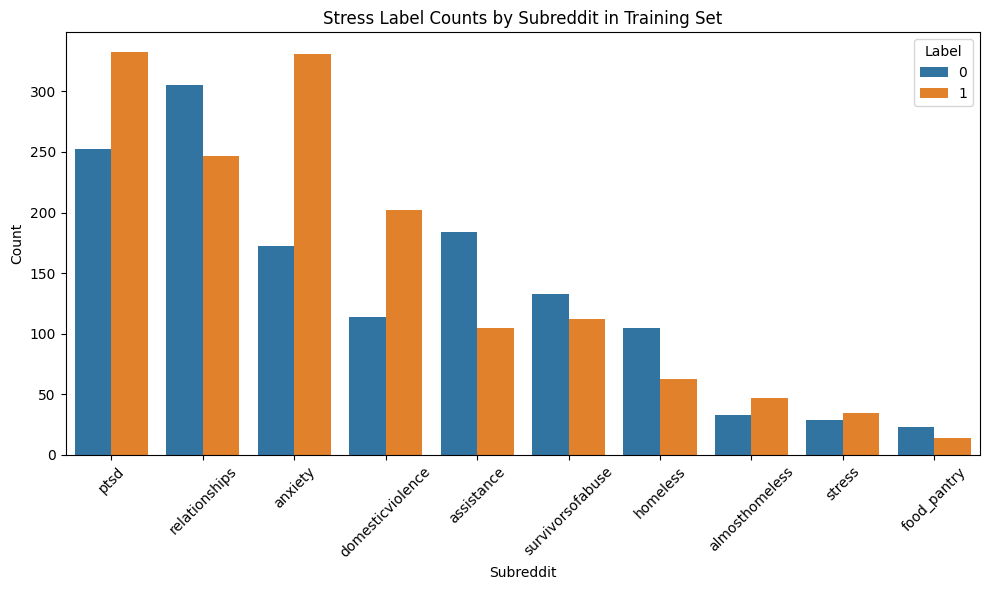

In [315]:
plot_label_counts_by_subreddit(train_df, "Training Set")

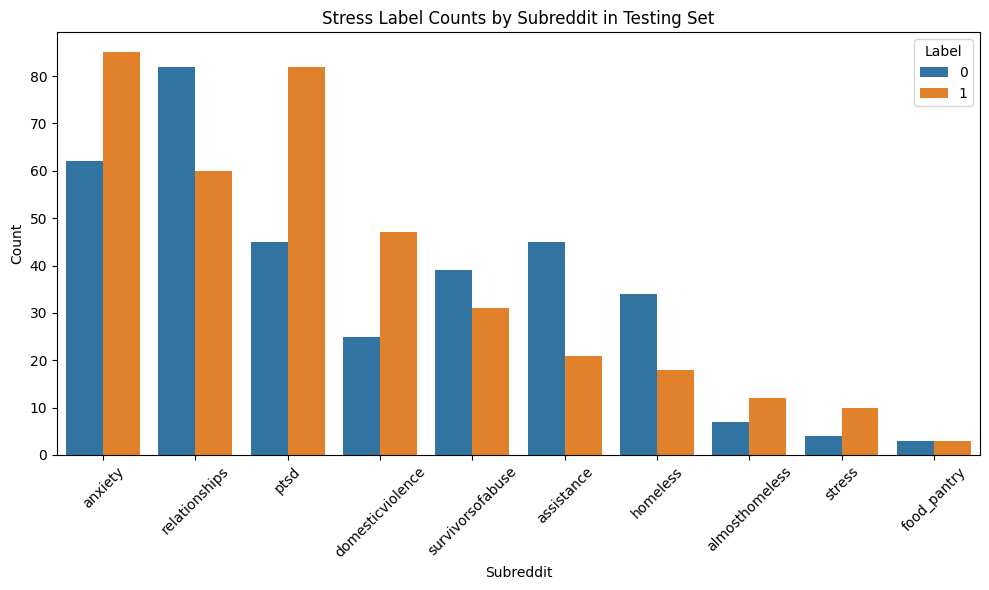

In [316]:
plot_label_counts_by_subreddit(test_df, "Testing Set")

### Text Length

In [ ]:
def plot_text_length(df, df_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # histogram
    sns.histplot(df["lex_liwc_WC"], bins=40, kde=True)

    # set title and axes
    plt.title(f"Distribution of Word Count in {df_name}")
    ax.set_xlabel("Number of Words")
    ax.set_ylabel("Frequency")
    
    plt.tight_layout()

    # save plot
    plt.savefig(os.path.join(EDA_FOLDER_PATH, f"text_length_distribution_{df_name.lower()}.png"))
                
    plt.show()

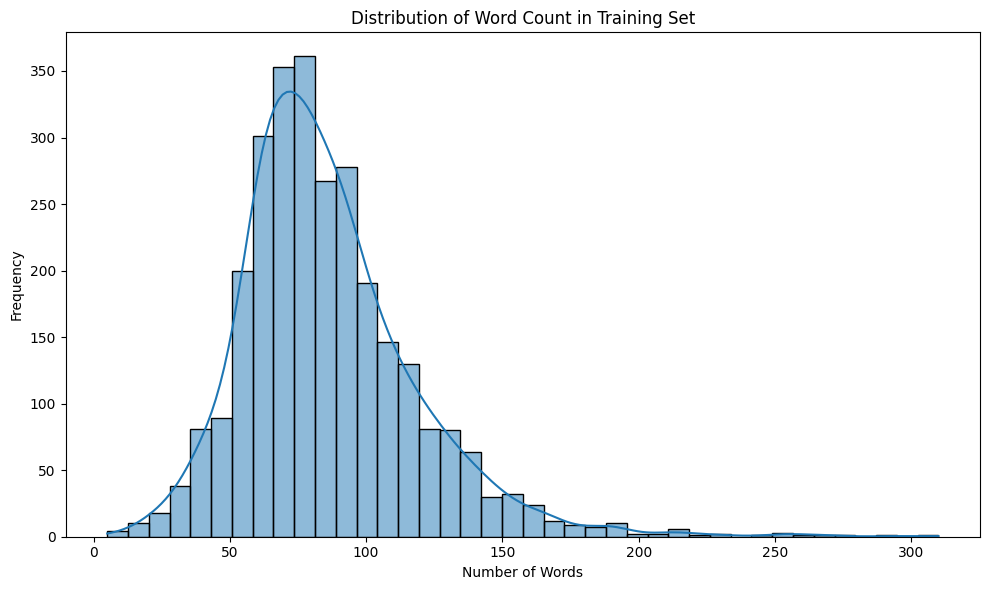

In [318]:
plot_text_length(train_df, "Training Set")

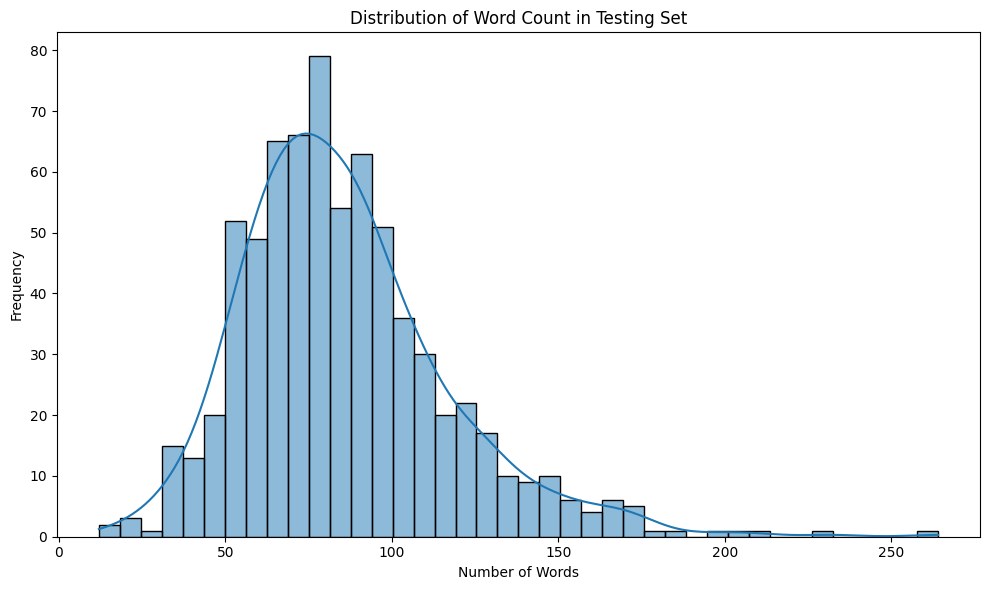

In [319]:
plot_text_length(test_df, "Testing Set")

### Readability and Sentiment, By Stress Label

In [ ]:
def plot_tone_against_sentiment_by_label(df, df_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # scatter plot by label
    sns.scatterplot(
        data=df,
        x="sentiment",
        y="lex_liwc_Tone",
        hue="label",
        palette={0: "#4C72B0", 1: "#DD8452"},
        alpha=0.7
    )

    # set title, axes and legend
    plt.title(f"Tone and Sentiment of Text, By Stress Label ({df_name})")
    ax.set_xlabel("Sentiment Score")
    ax.set_ylabel("LIWC Tone")
    ax.legend(title="Label")

    # edit x axis
    ax.set_xlim(-1, 1)
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.2))
    
    # edit y axis
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
    
    plt.tight_layout()

    # save plot
    plt.savefig(os.path.join(EDA_FOLDER_PATH, f"tone_sentiment_by_label_{df_name.lower()}.png"))

    plt.show()

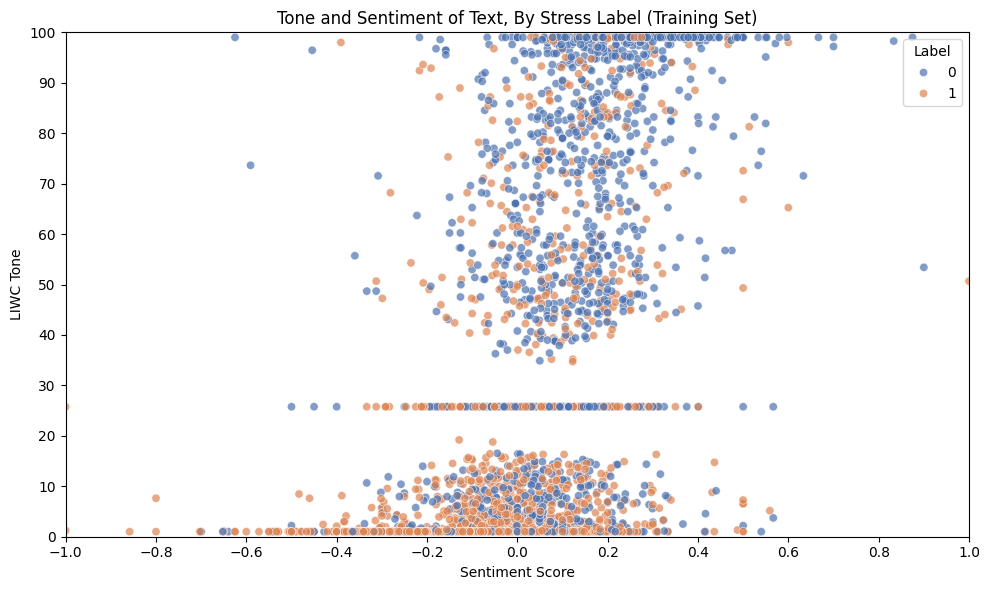

In [321]:
plot_tone_against_sentiment_by_label(train_df, "Training Set")

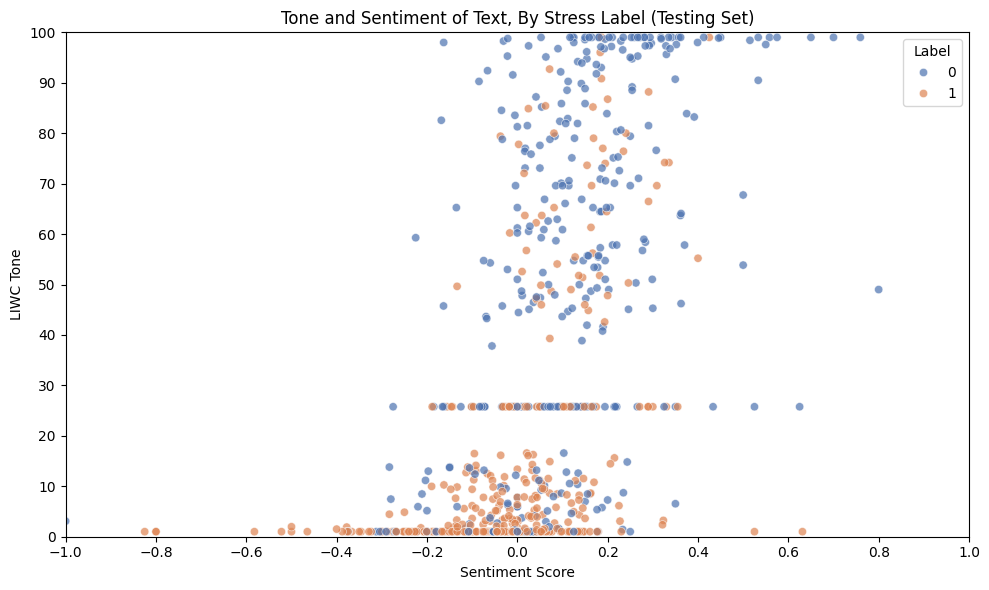

In [322]:
plot_tone_against_sentiment_by_label(test_df, "Testing Set")

## Data Processing